In [1]:
# 필요한 라이브러리들을 import 합니다.
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import pandas as pd
from faker import Faker

# Faker에 한국어 locale을 설정합니다.
fake = Faker(locale='ko_KR')

# 사용자 ID, IP, 이메일, 휴대폰 번호 노드를 생성합니다.
uid = ['uid_'+str(fake.random_int(10000, 10012)) for i in range(0,12)]
ip = ['ip_'+fake.ipv4() for i in range(0,4)]*3
uid1  = ['uid_'+str(fake.random_int(10000, 10100)) for i in range(0,100)]
email = ['em_'+fake.email() for i in range(0,50)]*2
phone = ['ph_'+fake.phone_number() for i in range(0,100)]*1

In [2]:
# 생성한 노드들을 사용하여 데이터프레임을 생성합니다.
df1 = pd.DataFrame({
    'sr':uid,
    'ds':ip
})
df2 = pd.DataFrame({
    'sr':uid1,
    'ds':email
     })
df3 = pd.DataFrame({
    'sr':email,
    'ds':phone
     })
df = pd.concat([df1,df2,df3])

In [4]:
df.head()

,sr,ds
0,uid_10011,ip_47.109.232.253
1,uid_10001,ip_76.92.249.218
2,uid_10011,ip_87.97.36.182
3,uid_10001,ip_92.169.38.50
4,uid_10003,ip_47.109.232.253


In [5]:
# 데이터프레임을 그룹화하고 인덱스를 재설정합니다.
df = df.groupby(['sr','ds']).agg({'ds': ['count']}).reset_index()
df.head()

sr               ds      
                                                count
0  em_bagyeongceol@example.net  ph_011-224-6666     1
1  em_bagyeongceol@example.net  ph_02-5157-2506     1
2       em_boram64@example.com  ph_02-8339-1952     1
3       em_boram64@example.com  ph_044-019-8336     1
4     em_caeweon07@example.net  ph_016-150-5155     1

In [6]:
# 그래프 객체를 생성하고 노드들을 추가합니다.
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

In [8]:
da[:10]

array([['em_bagyeongceol@example.net', 'ph_011-224-6666', 1],
       ['em_bagyeongceol@example.net', 'ph_02-5157-2506', 1],
       ['em_boram64@example.com', 'ph_02-8339-1952', 1],
       ['em_boram64@example.com', 'ph_044-019-8336', 1],
       ['em_caeweon07@example.net', 'ph_016-150-5155', 1],
       ['em_caeweon07@example.net', 'ph_054-281-0994', 1],
       ['em_caeweon51@example.org', 'ph_02-9175-8101', 1],
       ['em_caeweon51@example.org', 'ph_070-3580-8029', 1],
       ['em_coeseonghun@example.net', 'ph_053-196-0519', 1],
       ['em_coeseonghun@example.net', 'ph_054-701-5145', 1]], dtype=object)

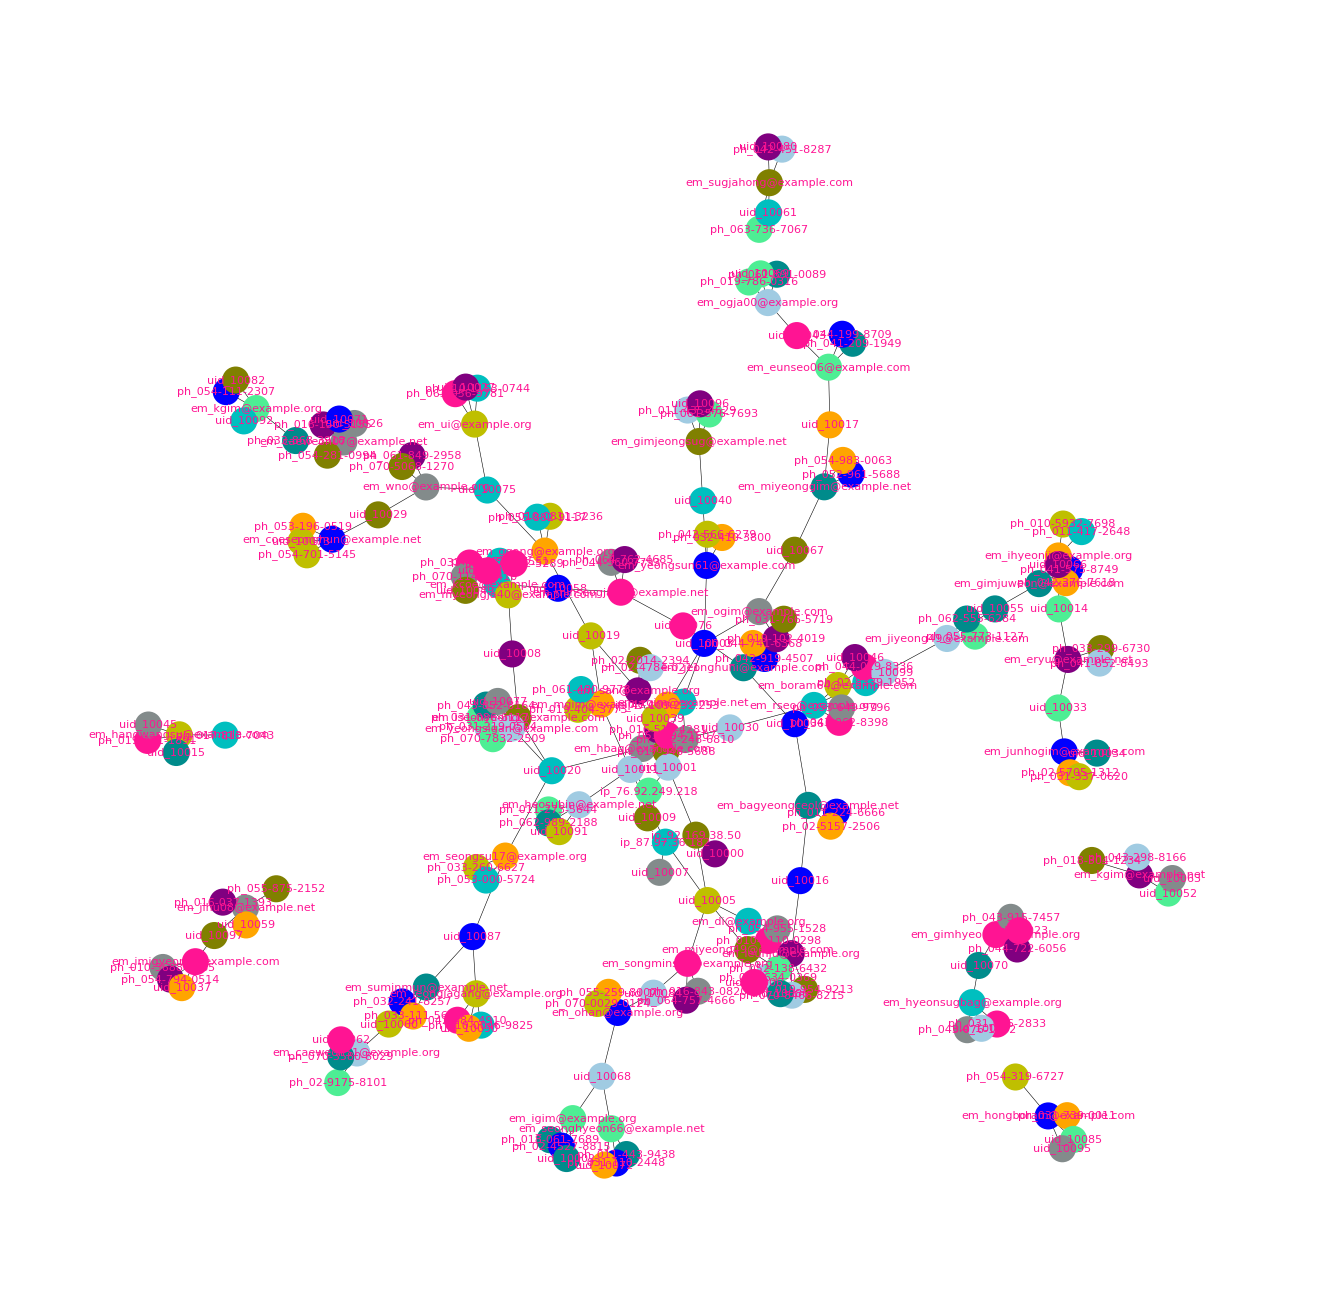

In [9]:
# 그래프를 그립니다.
colors = ['#008B8B','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*50
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(4,4),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 font_color = 'DeepPink',
                 node_size=15,
                 font_size=2,
                 alpha=1.0,
                 width=0.1
                 )
plt.axis('off')
plt.show()

In [10]:
# 그래프에서 연결된 컴포넌트(서브그래프)를 찾습니다.
com = list(nx.connected_components(G))
print(com[:10])

[{'uid_10049', 'ph_033-482-1727', 'ph_044-019-8336', 'ph_02-5157-2506', 'uid_10036', 'em_bagyeongceol@example.net', 'em_ieunju@example.org', 'uid_10016', 'ph_044-741-6368', 'ph_02-8339-1952', 'ph_042-919-4507', 'ph_011-224-6666', 'uid_10058', 'em_kcoe@example.com', 'ph_019-954-9213', 'ph_044-960-7793', 'uid_10086', 'uid_10046', 'em_minseogjang@example.net', 'em_boram64@example.com', 'uid_10076', 'em_jeonghuni@example.com', 'ph_070-8466-8215', 'ph_064-762-4685', 'ph_070-1147-3410'}, {'uid_10026', 'ph_016-150-5155', 'uid_10071', 'ph_054-281-0994', 'em_caeweon07@example.net'}, {'em_myeongja40@example.com', 'ph_031-086-6117', 'ph_031-337-0620', 'ph_02-5705-1312', 'ph_016-515-4281', 'ph_055-773-1127', 'ph_062-555-6284', 'ph_042-376-7618', 'ph_041-575-8749', 'uid_10066', 'em_eryu@example.net', 'ph_070-3580-8029', 'uid_10087', 'ph_010-5932-7698', 'ph_010-0046-9825', 'em_iseonyeong@example.com', 'ph_043-852-8164', 'ph_02-9175-8101', 'uid_10094', 'em_caeweon51@example.org', 'ph_033-260-6627', '

In [11]:
# 각 컴포넌트를 그룹으로 나눕니다.
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 그룹의 크기를 확인합니다.
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False)  

,object_id
group_id,
3,89
2,57
0,25
4,9
7,9
1,5
5,5
6,5
8,5


In [12]:
# Node2Vec 모델을 설정하고 훈련합니다.
node2vec = Node2Vec(G, 
                    dimensions=64, 
                    walk_length=30, 
                    num_walks=200, 
                    workers=4
                    ) 

model = node2vec.fit(window=10, 
                     min_count=1, 
                     batch_words=4
                     )

Computing transition probabilities:   0%|          | 0/219 [00:00<?, ?it/s]

In [13]:
# Node2Vec 모델을 이용하여 'uid_10033'과 가장 유사한 노드들을 찾습니다.
model.wv.most_similar('uid_10033', topn = 20) 

[('ph_02-5705-1312', 0.9554234743118286),
 ('ph_031-337-0620', 0.9551577568054199),
 ('em_junhogim@example.com', 0.954779863357544),
 ('uid_10034', 0.9539539217948914),
 ('ph_033-299-6730', 0.9425472021102905),
 ('ph_041-852-8493', 0.9419703483581543),
 ('em_eryu@example.net', 0.9417715072631836),
 ('uid_10014', 0.8980401158332825),
 ('em_ihyeonji@example.org', 0.8234201669692993),
 ('ph_011-417-2648', 0.7968569397926331),
 ('ph_010-5932-7698', 0.7955576181411743),
 ('uid_10066', 0.766356348991394),
 ('em_gimjuweon@example.com', 0.6620503664016724),
 ('ph_042-376-7618', 0.6497356295585632),
 ('ph_041-575-8749', 0.6412175893783569),
 ('uid_10055', 0.6064568758010864),
 ('ph_062-555-6284', 0.5060560703277588),
 ('em_jiyeong49@example.com', 0.496094286441803),
 ('ph_055-773-1127', 0.48480647802352905),
 ('uid_10099', 0.44583168625831604)]

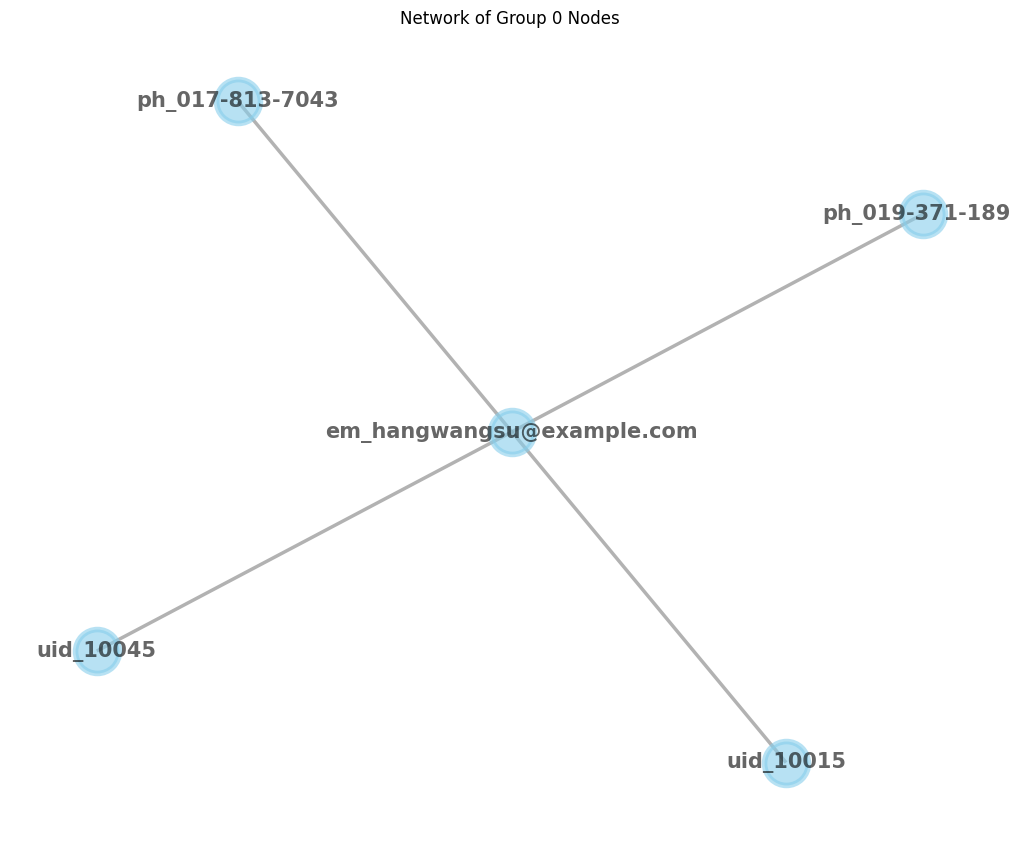

In [14]:
# 'df_com'에서 그룹 ID가 0인 노드들을 선택합니다.
group_0_nodes_sr = df_com[df_com['group_id'] == 5]['object_id']

# 'df'에서 sr 또는 ds 컬럼이 그룹 0에 속한 노드들과 일치하는 row들을 선택합니다.
ls = df[(df[('sr', '')].isin(group_0_nodes_sr)) & (df[('ds', '')].isin(group_0_nodes_sr))]

import networkx as nx
import matplotlib.pyplot as plt

# 위에서 필터링한 데이터프레임 'ls'를 이용하여 그래프 생성
G = nx.from_pandas_edgelist(ls, source=('sr', ''), target=('ds', ''))

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", node_shape="o", alpha=0.6, linewidths=4, font_size=15, font_weight="bold", width=2.5, edge_color="gray")
plt.title("Network of Group 0 Nodes")
plt.show()